Network Info:
	Learning rate: 0.001
	Max number of epochs: 500
	Cost Function: <function costFunction at 0x7fc622447e60>
	Train Loop Callback: None
	Cuda Available: True
	Network Structure
		Linear(in_features=1, out_features=100, bias=True) , relu
		Linear(in_features=100, out_features=100, bias=True) , relu
		Linear(in_features=100, out_features=1, bias=True) , none



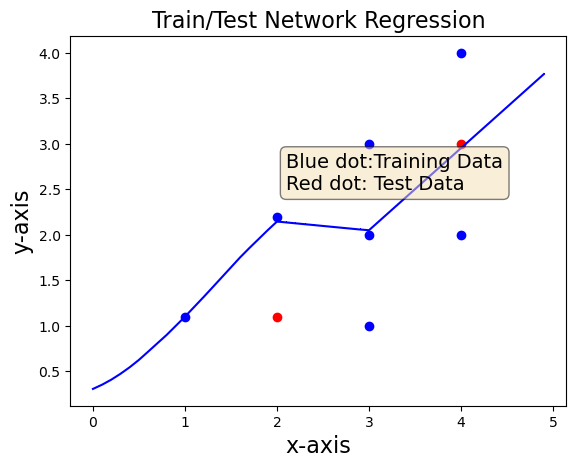

In [2]:
#!/usr/bin/env python

import wuml
import numpy as np
import torch
import wplotlib


#	Splits the data into training and test

data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
wuml.split_training_test(data, data_name='regress', data_path='../../data/', xdata_type="%.4f", ydata_type="%.4f", test_percentage=0.2)


def costFunction(x, y, ŷ, ind):
	ŷ = torch.squeeze(ŷ)
	return torch.sum((y- ŷ) ** 2)	

data_train = wuml.wData(xpath='../../data/regress_train.csv', ypath='../../data/regress_train_label.csv', batch_size=20, label_type='continuous')
data_test = wuml.wData(xpath='../../data/regress_test.csv', ypath='../../data/regress_test_label.csv', batch_size=20, label_type='continuous')

bNet = wuml.basicNetwork(costFunction, data_train, networkStructure=[(100,'relu'),(100,'relu'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=False)


Ŷ_train = bNet(data_train, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor
Ŷ_test = bNet(data_test, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷ_line = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor


#	plot the results out
splot = wplotlib.scatter()
splot.add_plot(data_train.X, data_train.Y, marker='o', color='blue')
splot.add_plot(data_test.X, data_test.Y, marker='o', color='red')

lp = wplotlib.lines()	
lp.add_plot(newX, Ŷ_line)

splot.show(title='Train/Test Network Regression', xlabel='x-axis', ylabel='y-axis',
			imgText='Blue dot:Training Data\nRed dot: Test Data')

